In [1]:
# Load libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importing Datasets
food_consumption=pd.read_csv('food_consumption.csv', index_col='Unnamed: 0')
print(food_consumption.head(), end='\n \n')
print('_____'*10)
#See the shape of the Data Frame 
print(f'Data Shape is : {food_consumption.shape}\nNumber of rows is : {food_consumption.shape[0]}\nNumber of culomns is : {food_consumption.shape[1]}')

     country food_category  consumption  co2_emission
1  Argentina          pork        10.51         37.20
2  Argentina       poultry        38.66         41.53
3  Argentina          beef        55.48       1712.00
4  Argentina     lamb_goat         1.56         54.63
5  Argentina          fish         4.36          6.96
 
__________________________________________________
Data Shape is : (1430, 4)
Number of rows is : 1430
Number of culomns is : 4


In [3]:
# See some useful informations such as (NaNs, Name of columns and type of variables)
print(food_consumption.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 1 to 1430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 55.9+ KB
None


In [4]:
# See some DataFrame statiscis 
print(food_consumption.describe())

       consumption  co2_emission
count  1430.000000   1430.000000
mean     28.110406     74.383993
std      49.818044    152.098566
min       0.000000      0.000000
25%       2.365000      5.210000
50%       8.890000     16.530000
75%      28.132500     62.597500
max     430.760000   1712.000000


In [5]:
# Calculate the quartiles of co2_emission
quartiles=np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1])
print(quartiles)


[   0.        5.21     16.53     62.5975 1712.    ]


In [ ]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [ ]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.
print(np.quantile(food_consumption['co2_emission'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


Text(0.5, 1.0, 'Standard Deviation CO2 Emission')

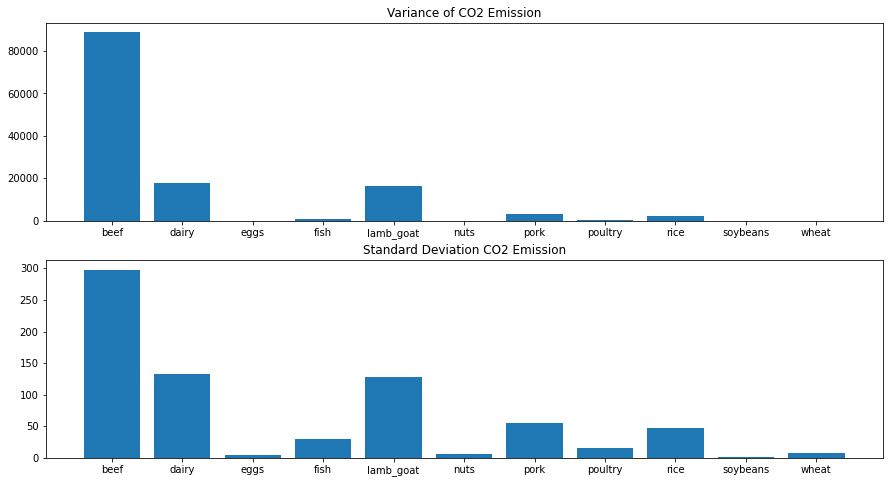

In [41]:
# Print variance and sd of co2_emission for each food_category
var_std=food_consumption.groupby('food_category')['co2_emission'].agg(['var','std'])
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var','std']))

#Plotting values
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

axes[0].bar(var_std.index, var_std['var'])
axes[0].set_title('Variance of CO2 Emission')
axes[1].bar(var_std.index, var_std['std'])
axes[1].set_title('Standard Deviation CO2 Emission')

<AxesSubplot: ylabel='Frequency'>

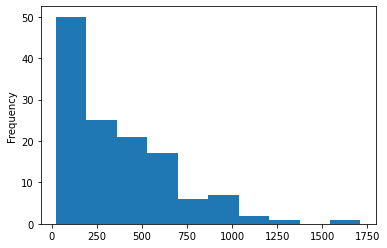

In [52]:
test= food_consumption['co2_emission'][food_consumption['food_category']=="beef"]
test.plot(kind='hist')